### Part 5: Machine Learning

In [ ]:
#dummy model, linear regression 
#xgboosting, lightgbm, catboost
#ML from University of Washington 

In [199]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
import numpy as np

In [178]:
X = pd.read_csv('data/features.csv', parse_dates = [1], index_col = [0, 1])
y = pd.read_csv('data/target.csv', parse_dates = [1], index_col = [0, 1])

In [179]:
def mape(y_test, y_pred):
    return 1 - np.mean(np.absolute((y_test - y_pred)/y_test))

class BenchmarkModel:
    def __init__(self):
        self.y_pred = None
    
    def predict(self, X_test):
        self.y_pred = X_test['start_count_day_bf']
        return self.y_pred
    
    def score(self, X_test, y_test, scoring_func, plot_residuals=False):
        # MAPE-mean absolute percentage error
        if self.y_pred == None:
            self.y_pred = BenchmarkModel.predict(self, X_test)
        
        if plot_residuals == True:
            residuals = y_test.values.reshape(-1) - self.y_pred.values
            plt.plot(np.arange(len(y_test)), residuals, 'o', label='Residuals')
            plt.plot(np.arange(len(y_test)), np.zeros(len(y_test)), '--')
            plt.legend()
            plt.show()

        return scoring_func(y_test.values.reshape(-1), self.y_pred.values)

In [205]:
from sklearn.model_selection import TimeSeriesSplit


scores = []
for station in X.index.get_level_values(0).unique():
    acc = []
    
    for _, test_index in TimeSeriesSplit(n_splits=3).split(X.loc[station]):
        model = BenchmarkModel()
        acc.append(model.score(X.loc[station].iloc[test_index], y.loc[station].iloc[test_index], mean_squared_error))
    
    scores.append((station, np.mean(acc)))

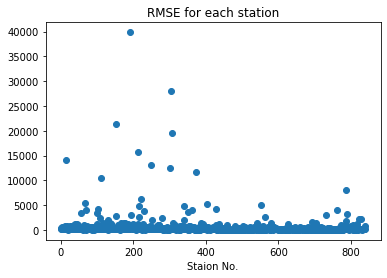

In [206]:
plt.scatter(*zip(*scores))
plt.xlabel('Staion No.')
plt.title('RMSE for each station')
plt.show()

In [241]:
for train_index, test_index in TimeSeriesSplit(n_splits=3).split(X_1):
    reg = lm.Ridge(alpha=1).fit(X_1.iloc[train_index], y_1.iloc[train_index])
    pred = reg.predict(X_1.iloc[test_index])
    print(mean_squared_error(y_1.iloc[test_index], pred))

91.61277793340119
99.74623724093507
74.015414689523


In [247]:
#just train on whole dataset; predict on log(y)
#do simple split- for hyperparameter tuning use TimeSeriesSplit
scores_linreg = []
coeffs_mean = []
for station in X.index.get_level_values(0).unique():
    acc_linreg = []
    coeffs = []
    
    for _, test_index in TimeSeriesSplit(n_splits=3).split(X.loc[station]):
        model = lm.Ridge(alpha=1).fit(X.loc[station].iloc[train_index], y.loc[station].iloc[train_index])
        predicted = model.predict(X.loc[station].iloc[test_index])
        acc_linreg.append(mean_squared_error(y.loc[station].iloc[test_index], predicted))
        coeffs.append(model.coef_)
    
    scores_linreg.append((station, np.mean(acc_linreg)))
    coeffs_mean.append(np.mean(coeffs, axis=0))

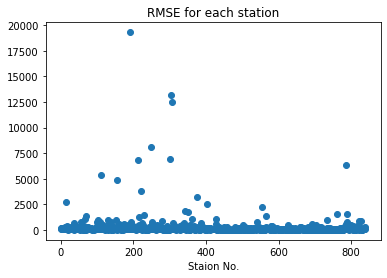

In [248]:
plt.scatter(*zip(*scores_linreg))
plt.xlabel('Staion No.')
plt.title('RMSE for each station')
plt.show()

In [266]:
val_1 = np.array([val for station, val in scores_linreg])
val_2 = np.array([val for station, val in scores])

In [273]:
(val_1 - val_2) 

9